# standardization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('diabetes.csv')
df.head() #display the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,169.5,33.6,0.627,50,1
1,1,85,66.0,29,102.5,26.6,0.351,31,0
2,8,183,64.0,32,169.5,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1


In [2]:
df.isnull().sum() # No null values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

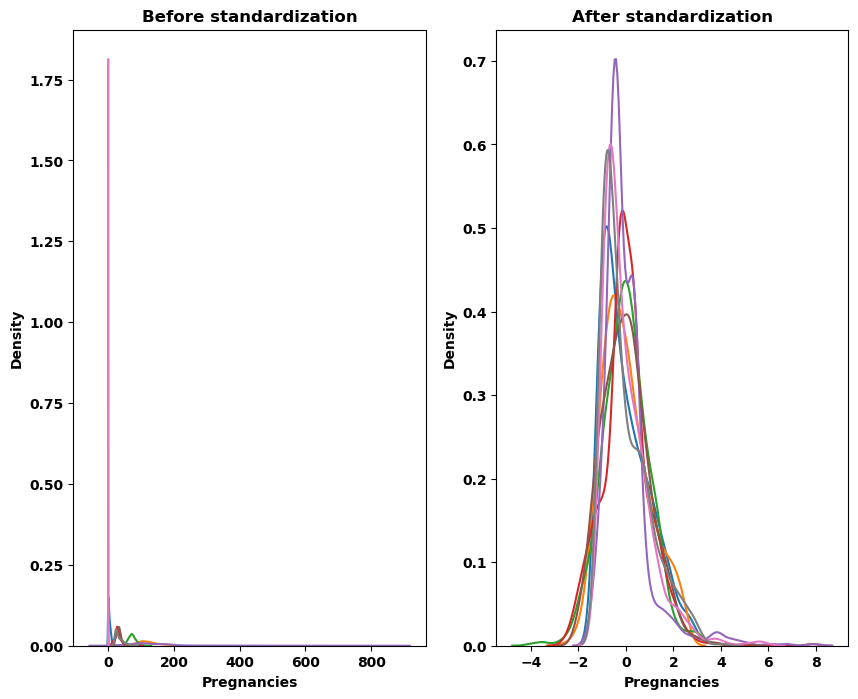

In [ ]:
# standardization 
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8)) 

ax1.set_title('Before standardization')
sns.kdeplot(df['Pregnancies'], ax=ax1)
sns.kdeplot(df['Glucose'], ax=ax1)
sns.kdeplot(df['BloodPressure'], ax=ax1)
sns.kdeplot(df['SkinThickness'], ax=ax1)
sns.kdeplot(df['Insulin'], ax=ax1)
sns.kdeplot(df['BMI'], ax=ax1)
sns.kdeplot(df['DiabetesPedigreeFunction'], ax=ax1)
sns.kdeplot(df['Age'], ax=ax1)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_df = ss.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns =['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])

ax2.set_title('After standardization')
sns.kdeplot(scaled_df['Pregnancies'], ax=ax2)
sns.kdeplot(scaled_df['Glucose'], ax=ax2)
sns.kdeplot(scaled_df['BloodPressure'], ax=ax2)
sns.kdeplot(scaled_df['SkinThickness'], ax=ax2)
sns.kdeplot(scaled_df['Insulin'], ax=ax2)
sns.kdeplot(scaled_df['BMI'], ax=ax2)
sns.kdeplot(scaled_df['DiabetesPedigreeFunction'], ax=ax2)
sns.kdeplot(scaled_df['Age'], ax=ax2)

plt.show()

In [4]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995,1.365896
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672,-0.732120
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584,1.365896
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549,-0.732120
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496,1.365896


In [5]:
# fix the outcome
scaled_df.loc[scaled_df['Outcome'] <= 0, 'Outcome'] = 0
scaled_df.loc[scaled_df['Outcome'] > 0, 'Outcome'] = 1
scaled_df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995,1.0
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672,0.0
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584,1.0
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549,0.0
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496,1.0


# balancing the data

In [6]:
scaled_df['Outcome'].value_counts() # to check the dataset's balance | 0 = non diabetec people

0.0    500
1.0    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

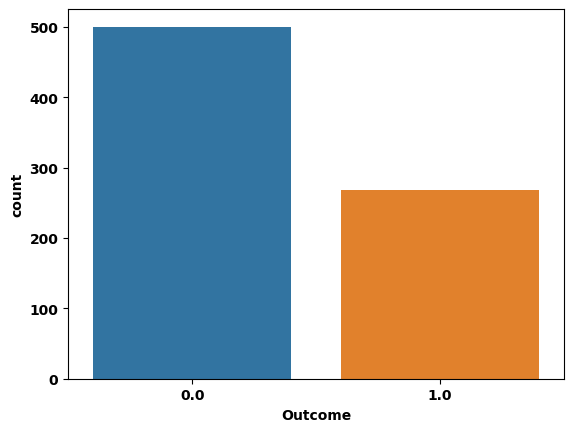

In [ ]:
sns.countplot(x='Outcome',data=scaled_df) # to visualize the balance

In [8]:
from imblearn.over_sampling import SMOTE # NOTE: We need to use SMOTE only in X and Y train.

from sklearn.model_selection import train_test_split

x = scaled_df.drop('Outcome', axis=1)
y = scaled_df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=123)

print(y_train.value_counts())

0.0    400
1.0    214
Name: Outcome, dtype: int64


In [ ]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x_train, y_train)

y_sm.value_counts() # balanced data

0.0    400
1.0    400
Name: Outcome, dtype: int64

# Grid for SVM

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split


svc_model = SVC()
svc_model.fit(x_sm,y_sm)


# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': [0.1, 1, 10]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=10) 

# Fit the grid search object to the data
grid_search.fit(x_sm, y_sm)

# Print the best hyper-parameters
print("Best hyper-parameters: ", grid_search.best_params_)
print("Best estimator: ", grid_search.best_estimator_)
print("Best score: ", grid_search.best_score_)

Best hyper-parameters:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best estimator:  SVC(C=10, gamma=1)
Best score:  0.8887499999999999


In [ ]:
from sklearn.model_selection import cross_val_score

svc_mode = SVC(C=10, kernel='rbf', gamma=0.1, random_state=123)
svc_mode.fit(x_sm,y_sm)


print("-------------------Cross Validation-----------------------")


#fit and evaluate the model.
scores = cross_val_score(svc_mode, x_sm, y_sm, cv=10, scoring='accuracy')
print("# Accuracy : %.3f%%" %(scores.mean()*100))

scores = cross_val_score(svc_mode, x_sm, y_sm, cv=10, scoring='precision_weighted')
print("# Precision : %.3f%% " %(scores.mean()*100))

scores = cross_val_score(svc_mode, x_sm, y_sm, cv=10, scoring='recall_weighted')
print("# Recall :  %.3f%% " %(scores.mean()*100))

scores = cross_val_score(svc_mode, x_sm, y_sm, cv=10, scoring='f1_weighted')
print("# F1 :  %.3f%% " %(scores.mean()*100))

-------------------Cross Validation-----------------------
# Accuracy : 88.500%
# Precision : 88.842% 
# Recall :  88.500% 
# F1 :  88.473% 


# Feature Selection for SVM

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

forwardselection = SFS(svc_mode, 
           k_features=(1,8), 
           forward=True,  #False > for Backward Elimination 
           scoring='accuracy',
           cv=10)
forwardselection = forwardselection.fit(x_sm, y_sm)

count=0
for i, name in enumerate (x_train.columns) :
    if i in forwardselection.k_feature_idx_:
        count+=1
        print(name)
    
X_train_fs = forwardselection.transform(x_sm)
X_test_fs = forwardselection.transform(x_test)


svc_mode.fit(X_train_fs, y_sm)
#y_pred=svc_mode.predict(X_test_fs)




print("--------------------Cross Validation----------------------")


#fit and evaluate the model.
scores = cross_val_score(svc_mode, X_train_fs, y_sm, cv=10, scoring='accuracy')
print("# Accuracy : %.3f%%" %(scores.mean()*100))

scores = cross_val_score(svc_mode, X_train_fs, y_sm, cv=10, scoring='precision_weighted')
print("# Precision : %.3f%% " %(scores.mean()*100))

scores = cross_val_score(svc_mode, X_train_fs, y_sm, cv=10, scoring='recall_weighted')
print("# Recall :  %.3f%% " %(scores.mean()*100))

scores = cross_val_score(svc_mode, X_train_fs, y_sm, cv=10, scoring='f1_weighted')
print("# F1 :  %.3f%% " %(scores.mean()*100))

Pregnancies
Glucose
SkinThickness
Insulin
BMI
Age
--------------------Cross Validation----------------------
# Accuracy : 88.875%
# Precision : 89.218% 
# Recall :  88.875% 
# F1 :  88.845% 


# Grid for adaboost

In [30]:
from sklearn.ensemble import AdaBoostClassifier
AdaObject=AdaBoostClassifier()
AdaObject.fit(x_sm,y_sm)


# Define the parameter grid
param_grid = {
    'n_estimators': [ 50, 100, 200, 500],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=AdaObject, param_grid=param_grid, cv=10) 

# Fit the grid search object to the data
grid_search.fit(x_sm, y_sm)

# Print the best hyper-parameters
print("Best hyper-parameters: ", grid_search.best_params_)
print("Best estimator: ", grid_search.best_estimator_)
print("Best score: ", grid_search.best_score_)

Best hyper-parameters:  {'learning_rate': 1.0, 'n_estimators': 100}
Best estimator:  AdaBoostClassifier(n_estimators=100)
Best score:  0.88375


In [ ]:
AdaObject=AdaBoostClassifier(n_estimators=200,learning_rate=1.0)
AdaObject.fit(x_sm, y_sm)




from sklearn.model_selection import cross_validate

print("----------------------Cross Validation----------------------")
#fit and evaluate the model.
scores = cross_val_score(AdaObject, x_sm, y_sm, cv=10, scoring='accuracy')
print("# Accuracy : %.3f%%" %(scores.mean()*100))

scores = cross_val_score(AdaObject, x_sm, y_sm, cv=10, scoring='precision_weighted')
print("# Precision : %.3f%% " %(scores.mean()*100))

scores = cross_val_score(AdaObject, x_sm, y_sm, cv=10, scoring='recall_weighted')
print("# Recall :  %.3f%% " %(scores.mean()*100))

scores = cross_val_score(AdaObject, x_sm, y_sm, cv=10, scoring='f1_weighted')
print("# F1 :  %.3f%% " %(scores.mean()*100))

# Feature Selection for adaboost

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

forwardselection = SFS(AdaObject, 
           k_features=(1,8), 
           forward=True,  #False > for Backward Elimination 
           scoring='accuracy',
           cv=10)
forwardselection = forwardselection.fit(x_sm,y_sm)

count=0
for i, name in enumerate (x_train.columns) :
    if i in forwardselection.k_feature_idx_:
        count+=1
        print(name)
    
X_train_fs = forwardselection.transform(x_sm)
X_test_fs = forwardselection.transform(x_test)

AdaObject.fit(X_train_fs, y_sm)
#y_pred=AdaObject.predict(X_test_fs)




print("----------------------Cross Validation----------------------")
#fit and evaluate the model.
scores = cross_val_score(AdaObject, X_train_fs, y_sm, cv=10, scoring='accuracy')
print("# Accuracy : %.3f%%" %(scores.mean()*100))

scores = cross_val_score(AdaObject, X_train_fs, y_sm, cv=10, scoring='precision_weighted')
print("# Precision : %.3f%% " %(scores.mean()*100))

scores = cross_val_score(AdaObject, X_train_fs, y_sm, cv=10, scoring='recall_weighted')
print("# Recall :  %.3f%% " %(scores.mean()*100))

scores = cross_val_score(AdaObject, X_train_fs, y_sm, cv=10, scoring='f1_weighted')
print("# F1 :  %.3f%% " %(scores.mean()*100))

# Grid for KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_k = KNeighborsClassifier()
model_k.fit(x_sm,y_sm)

# Pass the parameter 
param_grid = {"n_neighbors":[3,5,7,9,11],
              "weights" :['uniform', 'distance']}

grid_search = GridSearchCV(estimator=model_k, param_grid=param_grid, cv=10) 


# Fit the grid search object to the data
grid_search.fit(x_sm,y_sm)

# Print the best hyper-parameters
print("Best hyper-parameters: ", grid_search.best_params_)
print("Best estimator: ", grid_search.best_estimator_)
print("Best score: ", grid_search.best_score_)

In [ ]:
model_k=KNeighborsClassifier(n_neighbors=3,weights='distance')
model_k.fit(x_sm,y_sm)




from sklearn.model_selection import cross_validate

print("----------------------Cross Validation----------------------")
#fit and evaluate the model.
scores = cross_val_score(model_k, x_sm, y_sm, cv=10, scoring='accuracy')
print("# Accuracy : %.3f%%" %(scores.mean()*100))

scores = cross_val_score(model_k, x_sm, y_sm, cv=10, scoring='precision_weighted')
print("# Precision : %.3f%% " %(scores.mean()*100))

scores = cross_val_score(model_k, x_sm, y_sm, cv=10, scoring='recall_weighted')
print("# Recall :  %.3f%% " %(scores.mean()*100))

scores = cross_val_score(model_k, x_sm, y_sm, cv=10, scoring='f1_weighted')
print("# F1 :  %.3f%% " %(scores.mean()*100))

# Feature Selection for KNN

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

forwardselection = SFS(model_k, 
           k_features=(1,8), 
           forward=True,  #False > for Backward Elimination 
           scoring='accuracy',
           cv=10)

forwardselection = forwardselection.fit(x_sm,y_sm)

count=0
for i, name in enumerate (x_train.columns) :
    if i in forwardselection.k_feature_idx_:
        count+=1
        print(name)
    
X_train_fs = forwardselection.transform(x_sm)
X_test_fs = forwardselection.transform(x_test)


model_k = KNeighborsClassifier(n_neighbors=3,weights='distance')
model_k.fit(X_train_fs, y_sm)





print("----------------------Cross Validation----------------------")
#fit and evaluate the model.
scores = cross_val_score(model_k, X_train_fs, y_sm, cv=10, scoring='accuracy')
print("# Accuracy : %.3f%%" %(scores.mean()*100))

scores = cross_val_score(model_k, X_train_fs, y_sm, cv=10, scoring='precision_weighted')
print("# Precision : %.3f%% " %(scores.mean()*100))

scores = cross_val_score(model_k, X_train_fs, y_sm, cv=10, scoring='recall_weighted')
print("# Recall :  %.3f%% " %(scores.mean()*100))

scores = cross_val_score(model_k, X_train_fs, y_sm, cv=10, scoring='f1_weighted')
print("# F1 :  %.3f%% " %(scores.mean()*100))

# Grid for Decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_model = DecisionTreeClassifier(random_state=123)
decisiontree_model.fit(x_sm,y_sm)

param_grid = { 'max_features': ['sqrt'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=decisiontree_model, param_grid=param_grid, cv=10,) 
grid_search.fit(x_sm,y_sm)

print("Best hyper-parameters: ", grid_search.best_params_)
print("Best estimator: ", grid_search.best_estimator_)
print("Best score: ", grid_search.best_score_)

Best hyper-parameters:  {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt'}
Best estimator:  DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       max_features='sqrt', random_state=123)
Best score:  0.87375


In [24]:
decisiontree_mode = DecisionTreeClassifier(ccp_alpha= 0.001, criterion='entropy', max_depth=7, max_features='log2',random_state=123)
decisiontree_mode.fit(x_sm,y_sm)

print("----------------------Cross Validation----------------------")
#fit and evaluate the model.
scores = cross_val_score(decisiontree_mode, x_sm, y_sm, cv=10, scoring='accuracy')
print("# Accuracy : %.3f%%" %(scores.mean()*100))

scores = cross_val_score(decisiontree_mode, x_sm, y_sm, cv=10, scoring='precision_weighted')
print("# Precision : %.3f%% " %(scores.mean()*100))

scores = cross_val_score(decisiontree_mode, x_sm, y_sm, cv=10, scoring='recall_weighted')
print("# Recall :  %.3f%% " %(scores.mean()*100))

scores = cross_val_score(decisiontree_mode, x_sm, y_sm, cv=10, scoring='f1_weighted')
print("# F1 :  %.3f%% " %(scores.mean()*100))

----------------------Cross Validation----------------------
# Accuracy : 86.250%
# Precision : 86.618% 
# Recall :  86.250% 
# F1 :  86.218% 


# Feature Selection for Decision tree

In [25]:
forwardselection = SFS(decisiontree_mode, 
           k_features=(1,8), 
           forward=True,  #False > for Backward Elimination 
           scoring='accuracy',
           cv=10)
forwardselection = forwardselection.fit(x_sm, y_sm)

count=0
for i, name in enumerate (x_train.columns) :
    if i in forwardselection.k_feature_idx_:
        count+=1
        print(name)

X_train_fs = forwardselection.transform(x_sm)
X_test_fs = forwardselection.transform(x_test)
    
decisiontree_mode = DecisionTreeClassifier(ccp_alpha= 0.001, criterion='entropy', max_depth=6,max_features='sqrt' ,random_state=123)
decisiontree_mode.fit(X_train_fs,y_sm)

print("----------------------Cross Validation----------------------")
#fit and evaluate the model.
scores = cross_val_score(decisiontree_mode, X_train_fs, y_sm, cv=10, scoring='accuracy')
print("# Accuracy : %.3f%%" %(scores.mean()*100))

scores = cross_val_score(decisiontree_mode, X_train_fs, y_sm, cv=10, scoring='precision_weighted')
print("# Precision : %.3f%% " %(scores.mean()*100))

scores = cross_val_score(decisiontree_mode, X_train_fs, y_sm, cv=10, scoring='recall_weighted')
print("# Recall :  %.3f%% " %(scores.mean()*100))

scores = cross_val_score(decisiontree_mode, X_train_fs, y_sm, cv=10, scoring='f1_weighted')
print("# F1 :  %.3f%% " %(scores.mean()*100))

Pregnancies
Insulin
BMI
Age
----------------------Cross Validation----------------------
# Accuracy : 84.875%
# Precision : 85.247% 
# Recall :  84.875% 
# F1 :  84.822% 


# Grid for Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier() #without parameter
rf_model.fit(x_sm,y_sm)


# Define the parameter grid

param_grid = {
    'n_estimators': [10, 50, 100, 500],
     'max_depth': [5,10,15, None]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10) 


# Fit the grid search object to the data
grid_search.fit(x_sm,y_sm)

# Print the best hyper-parameters
print("Best hyper-parameters: ", grid_search.best_params_)
print("Best estimator: ", grid_search.best_estimator_)
print("Best score: ", grid_search.best_score_)

Best hyper-parameters:  {'max_depth': 15, 'n_estimators': 100}
Best estimator:  RandomForestClassifier(max_depth=15)
Best score:  0.9049999999999999


In [34]:
rf_model = RandomForestClassifier(max_depth= 15, n_estimators= 100, random_state=123)
rf_model.fit(x_sm,y_sm)


#cross_validate
from sklearn.model_selection import cross_validate
print("----------------------Cross Validation----------------------")
#fit and evaluate the model.
scores = cross_val_score(rf_model, x_sm, y_sm, cv=10, scoring='accuracy')
print("# Accuracy : %.3f%%" %(scores.mean()*100))

scores = cross_val_score(rf_model, x_sm, y_sm, cv=10, scoring='precision_weighted')
print("# Precision : %.3f%% " %(scores.mean()*100))

scores = cross_val_score(rf_model, x_sm, y_sm, cv=10, scoring='recall_weighted')
print("# Recall :  %.3f%% " %(scores.mean()*100))

scores = cross_val_score(rf_model, x_sm, y_sm, cv=10, scoring='f1_weighted')
print("# F1 :  %.3f%% " %(scores.mean()*100))

----------------------Cross Validation----------------------
# Accuracy : 89.750%
# Precision : 90.068% 
# Recall :  89.750% 
# F1 :  89.728% 


# Feature Selection for Random forest

In [35]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

forwardselection = SFS(rf_model, 
           k_features=(1,8), 
           forward=True,  #False > for Backward Elimination 
           scoring='accuracy',
           cv=10)
forwardselection = forwardselection.fit(x_sm, y_sm)

count=0
for i, name in enumerate (x_train.columns) :
    if i in forwardselection.k_feature_idx_:
        count+=1
        print(name)
    
X_train_fs = forwardselection.transform(x_sm)
X_test_fs = forwardselection.transform(x_test)


rf_model.fit(X_train_fs,y_sm)
y_pred=rf_model.predict(X_test_fs)



print("----------------------Cross Validation----------------------")
#fit and evaluate the model.
scores = cross_val_score(rf_model, X_train_fs, y_sm, cv=10, scoring='accuracy')
print("# Accuracy : %.3f%%" %(scores.mean()*100))

scores = cross_val_score(rf_model, X_train_fs, y_sm, cv=10, scoring='precision_weighted')
print("# Precision : %.3f%% " %(scores.mean()*100))

scores = cross_val_score(rf_model, X_train_fs, y_sm, cv=10, scoring='recall_weighted')
print("# Recall :  %.3f%% " %(scores.mean()*100))

scores = cross_val_score(rf_model, X_train_fs, y_sm, cv=10, scoring='f1_weighted')
print("# F1 :  %.3f%% " %(scores.mean()*100))


Pregnancies
Glucose
BloodPressure
Insulin
BMI
DiabetesPedigreeFunction
Age
----------------------Cross Validation----------------------
# Accuracy : 91.375%
# Precision : 91.555% 
# Recall :  91.375% 
# F1 :  91.364% 
